In [1]:
from src.model import PyTradeShifts
from src.postprocessing import Postprocessing
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('../')

In [2]:
ISIMIP = pd.read_csv(
        "." + "/data/scenario_files/ISIMIP_climate/ISIMIP_wheat_Hedlung.csv",
        index_col=0,
    )
nan_indices = ISIMIP.index[ISIMIP.iloc[:, 0].isnull()].tolist()
Wheat2018 = PyTradeShifts(
    "Wheat",
    2018,
    region="Global",
    testing=False,
    countries_to_remove=nan_indices,
    cd_kwargs={"seed": 2},
    make_plot=False,
)
ISIMIP = PyTradeShifts(
    crop="Wheat",
    base_year=2018,
    scenario_file_name="ISIMIP_climate/ISIMIP_wheat_Hedlung.csv",
    scenario_name="ISIMIP",
    countries_to_remove=nan_indices,
    cd_kwargs={"seed": 2},
    make_plot=False,
)

Loaded data for Wheat in Y2018.
Removed 0 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed 133 countries from the trade matrix.
Removed countries with trade below the 75th percentile.
Built trade graph.
Found 6 trade communities.
Loaded data for Wheat in Y2018.
Removed 0 countries with no trade or production.
Prebalanced trade matrix.
Corrected re-exports.
Removed 133 countries from the trade matrix.
Removed countries with trade below the 75th percentile.
Applied scenario ISIMIP.
Built trade graph.
Found 5 trade communities.


In [3]:
comparison = Postprocessing([Wheat2018, ISIMIP])

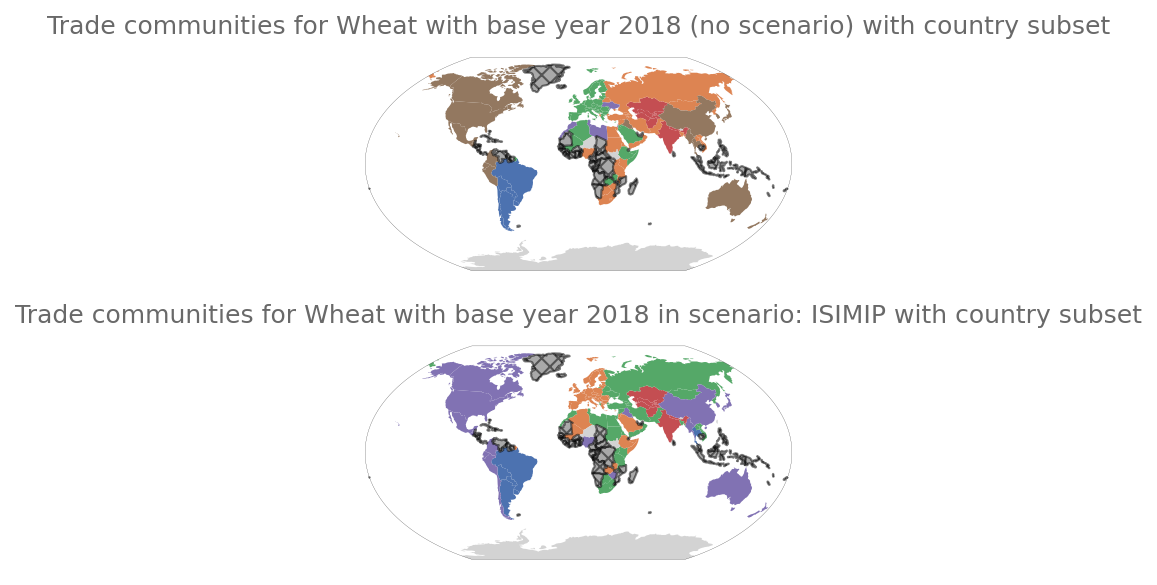

In [4]:
comparison.plot()

As we can see it is difficult to track countries between scenarios as colours are arbitrarily assigned.
That's where anchor countries come in.
User-specified list of countries that the script attempts to keep the same colour between scenarios.
Let's make Postprocessing class again, this time with anchors.

In [5]:
comparison = Postprocessing([Wheat2018, ISIMIP], anchor_countries=["China", "Russia"])

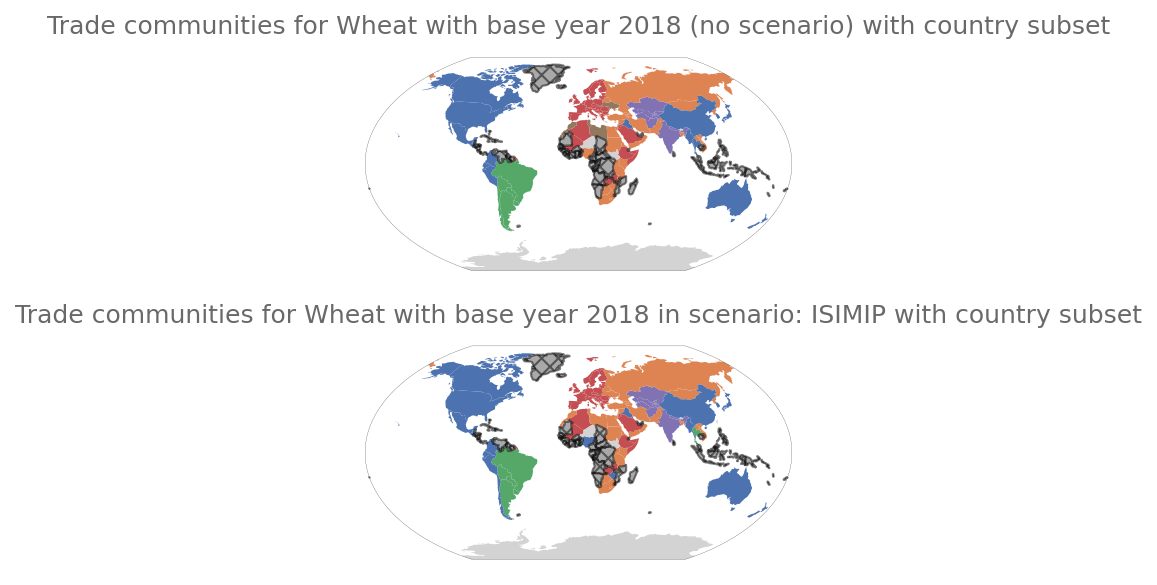

In [6]:
comparison.plot()

Now, China and Russia have persistent colours between scenarios making it easier to analyse the map.

We can also try to quantify how different the communities are in each scenario for each country.
The natural way of doing this is the [Jaccard index](https://en.wikipedia.org/wiki/Jaccard_index)
It measures the similarity between two sets.
So for each country we can compute a Jaccard distance (1-Jaccard index)
showing us by how much for each country their community changed.

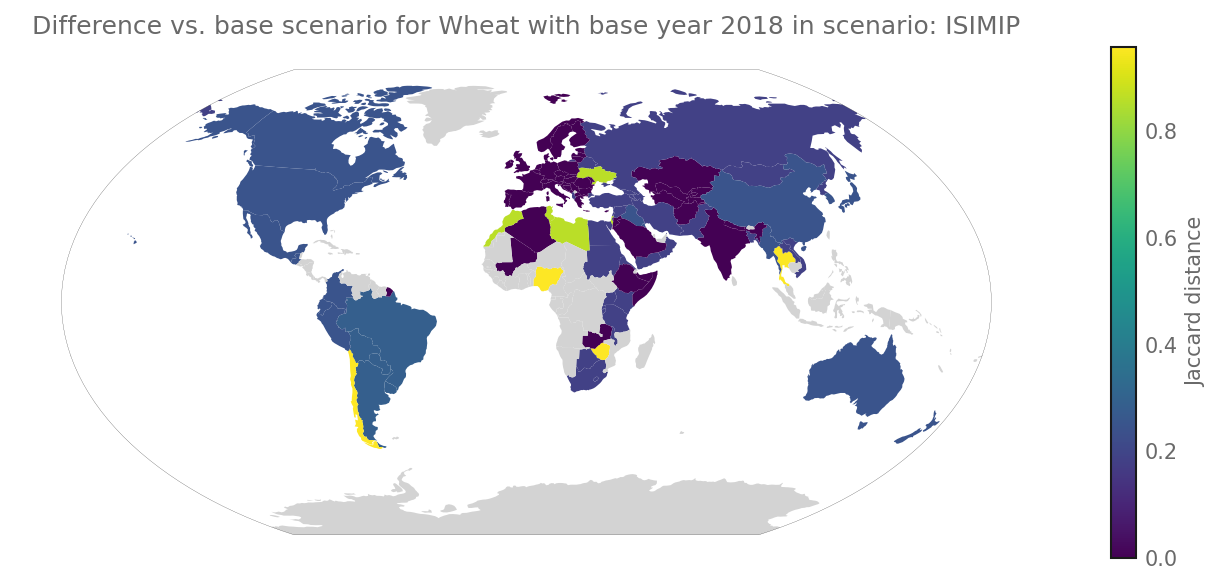

In [7]:
comparison.plot_community_diff()